In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_state_city
from math import pi, sqrt
from qiskit import transpile, QuantumCircuit
import qiskit.quantum_info as qi

from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel, amplitude_damping_error

from qiskit.tools.visualization import plot_histogram

In [3]:
state = [1, 0, 0, 0]

qc = QuantumCircuit(2) # two qubit circuit
qc.initialize(state)


# QUESTION, DID I HAVE TO TAKE THE CONJUGATE TRANSPOSE OF BELOW?
# conjugate transpose of (1/sqrt(2))[[1, -i], [1, i]]
custom_op = qi.Operator([[1/sqrt(2), 1j/sqrt(2)], [1/sqrt(2), -1j/sqrt(2)]]) 

qc.unitary(custom_op, 0, label='cust unitary')
qc.unitary(custom_op, 1, label='cust unitary')



qc.measure_all()
qc.draw()



┌──────────────────────┐┌──────────────┐ ░ ┌─┐   
   q_0: ┤0                     ├┤ cust unitary ├─░─┤M├───
        │  initialize(1,0,0,0) │├──────────────┤ ░ └╥┘┌─┐
   q_1: ┤1                     ├┤ cust unitary ├─░──╫─┤M├
        └──────────────────────┘└──────────────┘ ░  ║ └╥┘
meas: 2/════════════════════════════════════════════╩══╩═
                                                    0  1

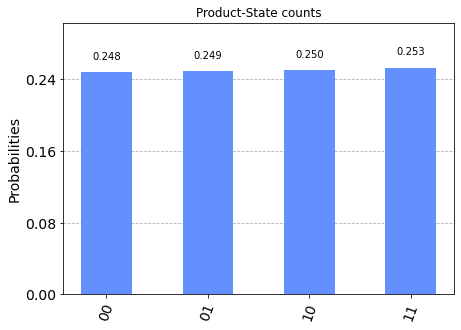

In [18]:
# Transpile for simulator
backend = Aer.get_backend('aer_simulator')
qc = transpile(qc, backend)

# Run and get counts
result = backend.run(qc, shots = 100_000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Product-State counts')